In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define directories
train_dir = 'Training'
test_dir = 'Testing'

# Image size
img_size = (128, 128)

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


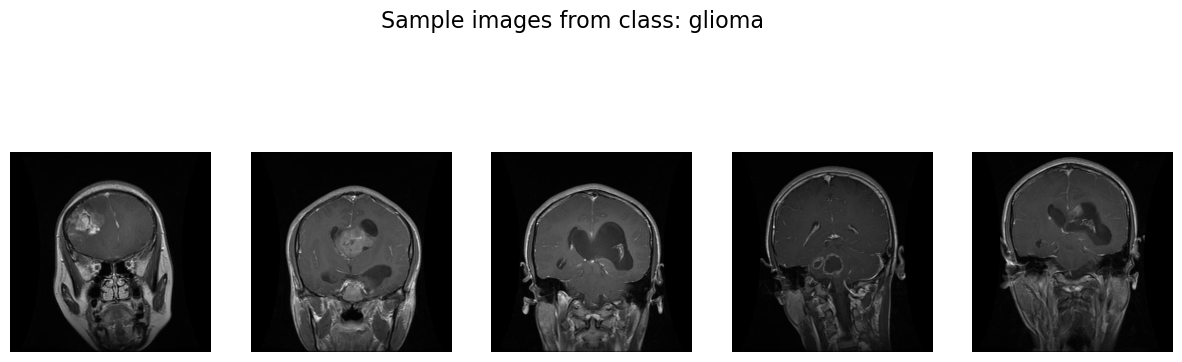

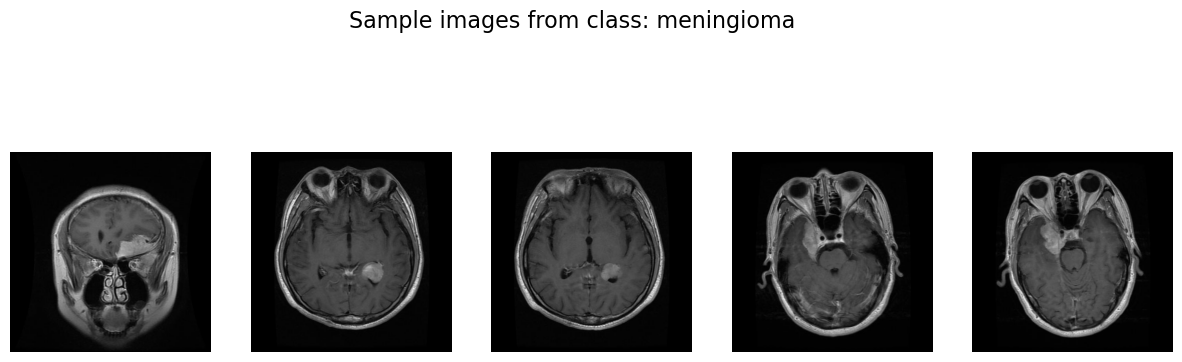

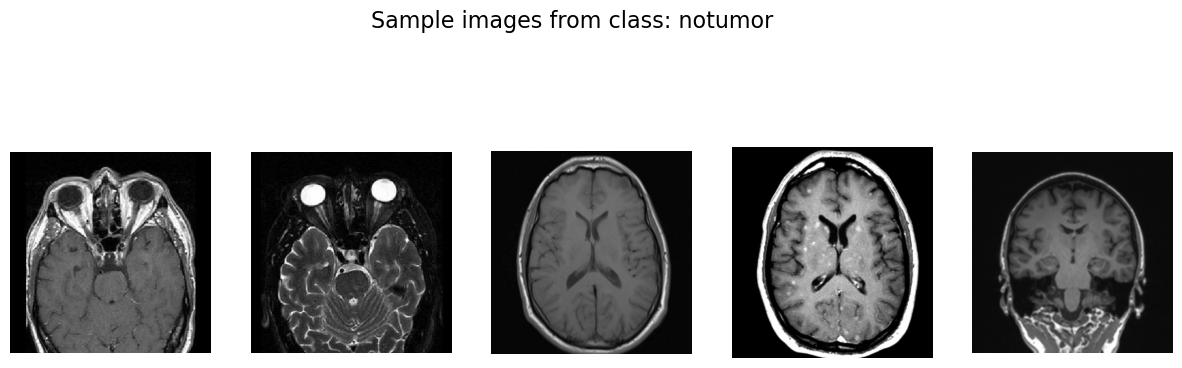

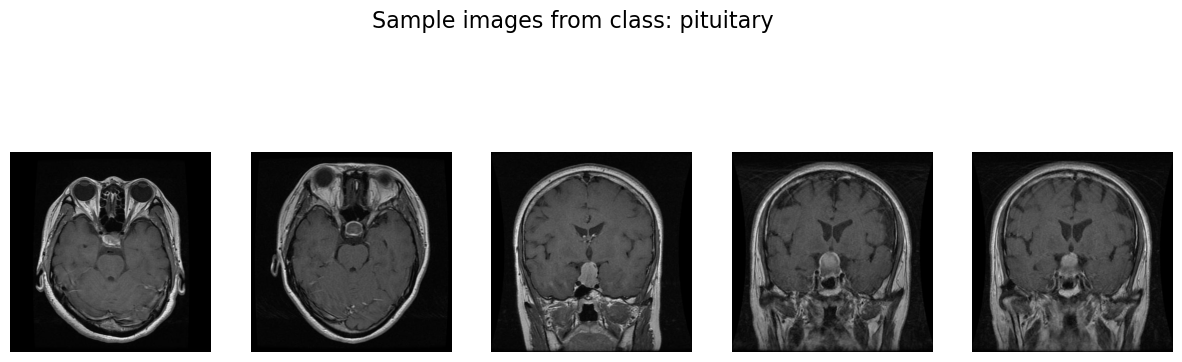

In [2]:
import matplotlib.pyplot as plt

# Visualize some images from each class
def plot_images_from_generator(generator, class_names, num_images=5):
    for class_name in class_names:
        class_idx = generator.class_indices[class_name]
        class_images = [img for img, label in zip(generator.filepaths, generator.classes) if label == class_idx]
        
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        fig.suptitle(f'Sample images from class: {class_name}', fontsize=16)
        
        for img_path, ax in zip(class_images[:num_images], axes):
            img = plt.imread(img_path)
            ax.imshow(img, cmap='gray')
            ax.axis('off')
        
        plt.show()

class_names = list(train_generator.class_indices.keys())
plot_images_from_generator(train_generator, class_names)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


C:\Users\ujami\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\ujami\miniconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 210ms/step - accuracy: 0.5814 - loss: 0.9437 - val_accuracy: 0.7872 - val_loss: 0.5131
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 203ms/step - accuracy: 0.8279 - loss: 0.4921 - val_accuracy: 0.8551 - val_loss: 0.3851
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - accuracy: 0.8757 - loss: 0.3381 - val_accuracy: 0.8680 - val_loss: 0.3527
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - accuracy: 0.8973 - loss: 0.2734 - val_accuracy: 0.8940 - val_loss: 0.2575
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 201ms/step - accuracy: 0.9209 - loss: 0.2097 - val_accuracy: 0.9062 - val_loss: 0.2353
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9339 - loss: 0.1778 - val_accuracy: 0.9146 - val_loss: 0.1935
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - accuracy: 0.9518 - loss: 0.1483 - val_accuracy: 0.9367 - val_loss: 0.1652
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - accuracy: 0.9544 - loss: 0.1221 - val

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9639 - loss: 0.1042
Test Accuracy: 95.58%


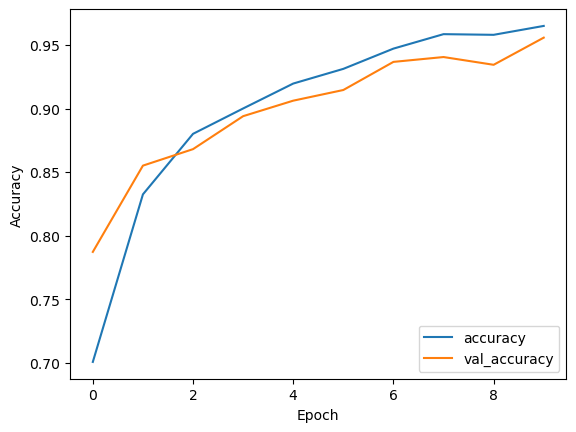

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [5]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters
data_dir = '.'
img_size = (128, 128)

# Load pretrained VGG16 model and extract features
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Data generator
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=32, class_mode=None, shuffle=False)

# Extract features
features = model.predict(generator)
features = features.reshape(features.shape[0], -1)  # Flatten the features

# Save the filenames and class indices
filepaths = generator.filepaths
class_indices = generator.class_indices

# Create better descriptions for each image
descriptions = []
for fp, cls in zip(filepaths, generator.classes):
    class_name = list(class_indices.keys())[list(class_indices.values()).index(cls)]
    descriptions.append(f"This MRI scan shows the characteristics of a {class_name} tumor. The image located at {fp} contains features typical of this type of tumor, such as irregular borders and heterogeneous intensity. Further analysis can provide insights into the size, shape, and potential impact of the tumor.")


Found 7023 images belonging to 3 classes.
220/220 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step


In [6]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Generate reports using LLM
def generate_report(description):
    prompt = (f"Analyze the following MRI scan description and provide a detailed medical report with insights into the key characteristics of the tumor, "
              f"potential implications for the patient's health, and recommendations for further analysis:\n\n{description}\n\n"
              "Detailed Medical Report:")
    inputs = tokenizer(prompt, return_tensors='pt')
    outputs = model.generate(inputs.input_ids, max_length=300, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example: Generate a report for the first few image descriptions
for i, description in enumerate(descriptions[:1]):  # Generate reports for the first image
    report = generate_report(description)
    print(f"Report for image {i + 1}:\n{report}\n")


Report for image 1:
Analyze the following MRI scan description and provide a detailed medical report with insights into the key characteristics of the tumor, potential implications for the patient's health, and recommendations for further analysis:

This MRI scan shows the characteristics of a Testing tumor. The image located at.\Testing\glioma\Te-glTr_0000.jpg contains features typical of this type of tumor, such as irregular borders and heterogeneous intensity. Further analysis can provide insights into the size, shape, and potential impact of the tumor.

Detailed Medical Report:

This MRI scan shows the characteristics of a Testing tumor. The image located at.\Testing\glioma\Te-glTr_0000.jpg contains features typical of this type of tumor, such as irregular borders and heterogeneous intensity. Further analysis can provide insights into the size, shape, and potential impact of the tumor.

This MRI scan shows the characteristics of a Testing tumor. The image located at.\Testing\glioma